### [참고] <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas Cheat Sheet</a>

In [1]:
import pandas as pd
import numpy as np

## melt
https://pandas.pydata.org/docs/reference/api/pandas.melt.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_melt.png">

- 1 개 이상 열들을 식별자 변수 형식으로 재형성<br>
<b style='color:red'>- 열 축소, 행 확장</b>

In [2]:
df1 = pd.DataFrame(
    {
        "first":["john","Mary"],
        "last":["Doe","Bo"],
        "height":[5.5,6.0],
        "weight":[130,150]
    }
)
df1

,first,last,height,weight
0,john,Doe,5.5,130
1,Mary,Bo,6.0,150


In [5]:
# 열 => 행

pd.melt(df1)

,variable,value
0,first,john
1,first,Mary
2,last,Doe
3,last,Bo
4,height,5.5
5,height,6.0
6,weight,130
7,weight,150


In [6]:
# first, last

df1.melt(id_vars=["first","last"])

,first,last,variable,value
0,john,Doe,height,5.5
1,Mary,Bo,height,6.0
2,john,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [31]:
pd.melt?


Signature:
pd.melt(
    frame: 'DataFrame',
    id_vars=None,
    value_vars=None,
    var_name=None,
    value_name: 'Hashable' = 'value',
    col_level=None,
    ignore_index: 'bool' = True,
) -> 'DataFrame'
Docstring:
Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

This function is useful to massage a DataFrame into a format where one
or more columns are identifier variables (`id_vars`), while all other
columns, considered measured variables (`value_vars`), are "unpivoted" to
the row axis, leaving just two non-identifier columns, 'variable' and
'value'.

Parameters
----------
id_vars : tuple, list, or ndarray, optional
    Column(s) to use as identifier variables.
value_vars : tuple, list, or ndarray, optional
    Column(s) to unpivot. If not specified, uses all columns that
    are not set as `id_vars`.
var_name : scalar
    Name to use for the 'variable' column. If None it uses
    ``frame.columns.name`` or 'variable'.
value_name : scalar, defaul

In [12]:
df = pd.DataFrame(
    {
        'A':{0:'a',1:'b',2:'c'},
        'B':{0:1,1:3,2:5},
        'C':{0:2,1:4,2:6}
    }
)
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [13]:
pd.melt(df,id_vars=["A"],value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [14]:
pd.melt(df,id_vars=["A"],value_vars=['B','C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [15]:
pd.melt(df)

,variable,value
0,A,a
1,A,b
2,A,c
3,B,1
4,B,3
5,B,5
6,C,2
7,C,4
8,C,6


#### [참고]
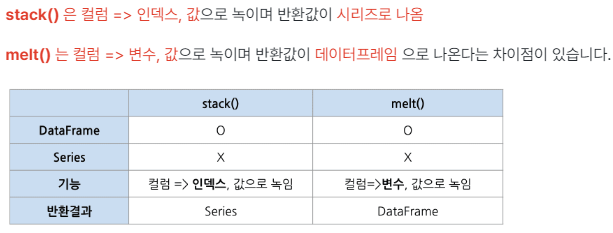

## pivot

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html

- pivot 사전적 의미 : 회전 또는 균형을 맞추는 중심축이나 고정점

<img src="https://pandas.pydata.org/docs/_images/reshaping_pivot.png">

In [35]:
pd.pivot?

Signature:
pd.pivot(
    data: 'DataFrame',
    *,
    columns: 'IndexLabel',
    index: 'IndexLabel | lib.NoDefault' = typing.Literal[<no_default>],
    values: 'IndexLabel | lib.NoDefault' = typing.Literal[<no_default>],
) -> 'DataFrame'
Docstring:
Return reshaped DataFrame organized by given index / column values.

Reshape data (produce a "pivot" table) based on column values. Uses
unique values from specified `index` / `columns` to form axes of the
resulting DataFrame. This function does not support data
aggregation, multiple values will result in a MultiIndex in the
columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

Parameters
----------
data : DataFrame
columns : str or object or a list of str
    Column to use to make new frame's columns.

    .. versionchanged:: 1.1.0
       Also accept list of columns names.

index : str or object or a list of str, optional
    Column to use to make new frame's index. If not given, uses existing index.

    .. versionchange

### [실습1]

In [21]:
data = {
    "name": ["haena","naeun","una","bum","suho"],
    "type": ["tennis","tennis","swin","swin","tennis"],
    "records": ["A","B","C","A","B"],
    "gender": ["F","F","F","M","M"],
    "period": [3,3,1,5,2]
}
sports_df = pd.DataFrame(data)
sports_df

,name,type,records,gender,period
0,haena,tennis,A,F,3
1,naeun,tennis,B,F,3
2,una,swin,C,F,1
3,bum,swin,A,M,5
4,suho,tennis,B,M,2


#### - 학생들이 활동하는 스포츠 종목에 따라 기록과 성별로 구분

In [20]:
sports_df.pivot(index="name",columns="type",values=["records","gender"])

records        gender       
type     swin tennis   swin tennis
name                              
bum         A    NaN      M    NaN
haena     NaN      A    NaN      F
naeun     NaN      B    NaN      F
suho      NaN      B    NaN      M
una         C    NaN      F    NaN

### [실습2]

In [37]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                  'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [38]:
df.pivot(index="foo",columns="bar",values="baz")

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [39]:
# index 해제

df.pivot(index="foo",columns="bar",values="baz").reset_index()

bar,foo,A,B,C
0,one,1,2,3
1,two,4,5,6


## pivot_table

- https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
- group by를 사용하기 쉽게 해 놓은 게 pivot_table
```
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'str' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
)
```


In [22]:
sports_df

,name,type,records,gender,period
0,haena,tennis,A,F,3
1,naeun,tennis,B,F,3
2,una,swin,C,F,1
3,bum,swin,A,M,5
4,suho,tennis,B,M,2


In [30]:
pd.pivot_table?

Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Hashable' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : list-like or scalar, optional
    Column or columns to aggregate.
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or l

### [실습1]
#### 1) aggfunc 를 주지 않은 경우 : default  mean 적용

In [27]:
sports_df.pivot_table(index="type",columns="records",values="period")

records,A,B,C
type,,,
swin,5.0,NaN,1.0
tennis,3.0,2.5,NaN


#### 2) aggfunc 를 주는 경우 : sum 적용

In [28]:
sports_df.pivot_table(index="type",columns="records",values="period",aggfunc="sum")

records,A,B,C
type,,,
swin,5.0,NaN,1.0
tennis,3.0,5.0,NaN


### [실습2]

In [40]:
from datetime import datetime

In [41]:
list1 = []

for i in range(1, 13):
    list1.append(datetime(2021,i,1))

In [44]:
[datetime(2021,i,1) for i in range(1, 13)]

[datetime.datetime(2021, 1, 1, 0, 0),
 datetime.datetime(2021, 2, 1, 0, 0),
 datetime.datetime(2021, 3, 1, 0, 0),
 datetime.datetime(2021, 4, 1, 0, 0),
 datetime.datetime(2021, 5, 1, 0, 0),
 datetime.datetime(2021, 6, 1, 0, 0),
 datetime.datetime(2021, 7, 1, 0, 0),
 datetime.datetime(2021, 8, 1, 0, 0),
 datetime.datetime(2021, 9, 1, 0, 0),
 datetime.datetime(2021, 10, 1, 0, 0),
 datetime.datetime(2021, 11, 1, 0, 0),
 datetime.datetime(2021, 12, 1, 0, 0)]

In [47]:
df = pd.DataFrame(
    {
        "A" : ["one", "one", "two", "three"] * 6,
        "B" : ["x", "y", "w"] * 8,
        "C" : ["ha", "ha", "ha", "hi", "hi", "hi"] * 4,
        "D" : np.arange(24),
        "E" : [datetime(2021,i,1) for i in range(1, 13)] + [datetime(2021,i,15) for i in range(1, 13)]
    }
)
df

,A,B,C,D,E
0,one,x,ha,0,2021-01-01
1,one,y,ha,1,2021-02-01
2,two,w,ha,2,2021-03-01
3,three,x,hi,3,2021-04-01
4,one,y,hi,4,2021-05-01
5,one,w,hi,5,2021-06-01
6,two,x,ha,6,2021-07-01
7,three,y,ha,7,2021-08-01
8,one,w,ha,8,2021-09-01
9,one,x,hi,9,2021-10-01


In [49]:
# index : A,B, columns : C, values : D

# 기본 형태 : mean(평균)
df.pivot_table(index=["A","B"], columns="C", values="D")

C          ha    hi
A     B            
one   w  14.0  11.0
      x   6.0  15.0
      y   7.0  10.0
three w   NaN  17.0
      x   NaN   9.0
      y  13.0   NaN
two   w   8.0   NaN
      x  12.0   NaN
      y   NaN  16.0

In [50]:
df.pivot_table(index=["A","B"], columns="C", values="D", aggfunc="sum")

C          ha    hi
A     B            
one   w  28.0  22.0
      x  12.0  30.0
      y  14.0  20.0
three w   NaN  34.0
      x   NaN  18.0
      y  26.0   NaN
two   w  16.0   NaN
      x  24.0   NaN
      y   NaN  32.0

### [정리] pivot 과 pivot_table()

- pivot : 형태만 변경
- pivot_table : 형태 + 연산

#### 아래 예제는 에러남

In [51]:
sports_df.pivot(index='type', columns = 'records', values='period')

ValueError: Index contains duplicate entries, cannot reshape

- 왜냐면, pivot 은 연산의 기능은 없기 때문에 period 값을 합산 시켜주지 못함

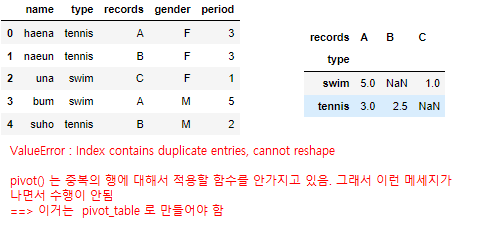